# Phase 3 Machine Learning Project- SYRIATEL CUSTOMER CHURN


- Student : Spencer Lugalia
- Student Pace : DSPT08
- Instructor: Samuel Karu, Daniel Ekale

## 1. Business understanding

The dataset pertains to SyriaTel telecommunications company seeking to understand and reduce customer churn. Churn, defined as customers leaving the service, significantly impacts revenue and profitability. Key business objectives include identifying factors contributing to churn, such as call usage patterns, subscription plans, and customer interactions, to predict at-risk customers. This analysis aims to uncover actionable insights to improve customer retention strategies, enhance service offerings, and focus on critical features like international plan subscriptions, daytime call usage, and customer service interactions to reduce churn rates and improve customer satisfaction.

### 1.1 Business problem

SyriaTel communication company is in need of a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Detecting customers who are likely to leave and putting retention plans in place to keep them are the primary business challenges. The company wants to reduce revenue loss by lowering turnover of customers.

### 1.2 The scope

The scope of the project include:

- Establishing if there are any predictable patterns whether a customer will ("soon") stop doing business with SyriaTel.

- Develop a predictive model to determine whether a customer will churn (binary classification: Yes/No) based on customer usage patterns, interaction with the company, and plan features.

- Provide actionable insights to SyriaTel to reduce customer churn by identifying high-risk customers and enabling targeted retention strategies.  

### 1.3 Data Source

The Churn in Telecom's dataset was sourced from [Churn Data](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

## 2 Data Understanding

Data understanding lets us explore and analyze our churn data to gain insights into its structure, content, and relationships.
It involves looking at the types of data, identifying patterns, checking for missing values, and understanding the distribution of variables.

In [69]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


##### Load dataset

In [70]:
# Read data from csv file,Checking the first 5 rows.
data = pd.read_csv('./Data/bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
#Checking the different columns info includig dtype and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- The data has 0 null values
- The data has various data types ranging from Object,integers, Floats and Booleans
- The structure of the data is 21 columns and 3333 entries

In [ ]:
# checking on all the column names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Columns overview

1. **state**: The state in which the customer resides.
2. **account length**: The duration (in months) the customer has had an account with the service provider.
3. **area code**: The area code associated with the customer's phone number.
4. **phone number**: The customer's phone number.
5. **international plan**: A binary indicator (yes/no) of whether the customer has an international calling plan.
6. **voice mail plan**: A binary indicator (yes/no) of whether the customer has a voicemail plan.
7. **number vmail messages**: The total number of voicemail messages received by the customer.
8. **total day minutes**: The total number of minutes the customer spent on daytime calls.
9. **total day calls**: The total number of daytime calls made by the customer.
10. **total day charge**: The total charge for daytime calls made by the customer.
11. **total eve minutes**: The total number of minutes the customer spent on evening calls.
12. **total eve calls**: The total number of evening calls made by the customer.
13. **total eve charge**: The total charge for evening calls made by the customer.
14. **total night minutes**: The total number of minutes the customer spent on nighttime calls.
15. **total night calls**: The total number of nighttime calls made by the customer.
16. **total night charge**: The total charge for nighttime calls made by the customer.
17. **total intl minutes**: The total number of minutes the customer spent on international calls.
18. **total intl calls**: The total number of international calls made by the customer.
19. **total intl charge**: The total charge for international calls made by the customer.
20. **customer service calls**: The total number of calls the customer made to customer service.
21. **churn**: A binary indicator (1/0) representing whether the customer has churned (left the service) or not.

In [76]:
# Descriptive statistics for the numerical columns in the dataset
data.describe().T


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [74]:
#checking the shape of the data
data.shape
print(f"This data set consists of {data.shape[0]} rows")
print(f"This data set consists of {data.shape[1]} columns")

This data set consists of 3333 rows
This data set consists of 21 columns


In [75]:
# Confirming there are no Null values
data.isnull().values.any()

False

In [78]:
# Checking the total number of duplicated rows
data.duplicated().sum()
print(f"This data set consists of duplicated {data.duplicated().sum()} rows")

This data set consists of duplicated 0 rows


### 2.1 Data Cleaning and Feature Engineering

At this point we have already established that there is 0 null and 0 duplicated rows therefore we will not have to fill null values or drop duplicated rows.

Therefore for this section i will do the following tasks:
- For the model drop non critical columns
- One-Hot Encode the 3 categorical columns 'international plan', 'voice mail plan' and 'state' to numerical.
- Check for, and remove outliers

In [79]:
# drop unimportant columns
data = data.drop(columns=['phone number','area code'],axis=1)

# Confirm columns are dropped
data.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [81]:
# OneHotCode the three categorical columns of interest

data = pd.get_dummies(data, columns=['international plan','voice mail plan','state'],drop_first=True)

# Convert the one-hot encoded columns and the target colum 'Churn' from boolean to integer 
for col in data.columns: 
    if data[col].dtype == 'bool':
          data[col] = data[col].astype(int) 
        
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Preview the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [88]:
def remove_outliers(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in data.columns if col != 'Churn' and data[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df = remove_outliers(data, feature_columns)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0


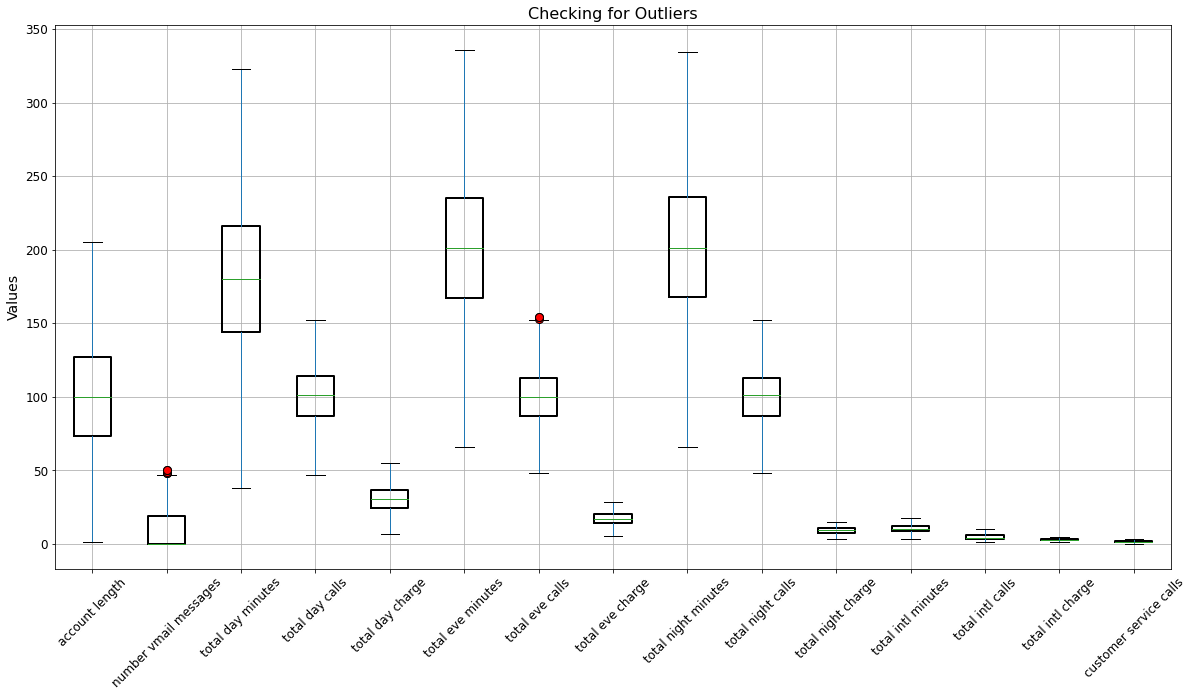

In [97]:

# Define a function to plot boxplots for cleaned columns
def plot_boxplots(df, columns):
    plt.figure(figsize=(20,10))  # Increase the figure size for better clarity
    df[columns].boxplot(boxprops=dict(linewidth=2), flierprops=dict(markerfacecolor='r', marker='o', markersize=8, linestyle='none'))  # Customize the outlier markers
    plt.title('Checking for Outliers', fontsize=16)  # Add a more descriptive title
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)  # Adjust y-axis label size for consistency
    plt.grid(True)  # Add a grid for better visual reference
    plt.show()

plot_boxplots(df, feature_columns)


### 2.2 Exploratory Data Analysis

In [102]:
# create a copy of the clean dataframe
df=df.copy(deep=True)

#### 2.2.1 Correlation Matrix


one hot code - number of vmail messages, international calls

minutes and charges are corelated, remove these ie charges columns

multi -  remove one of the two

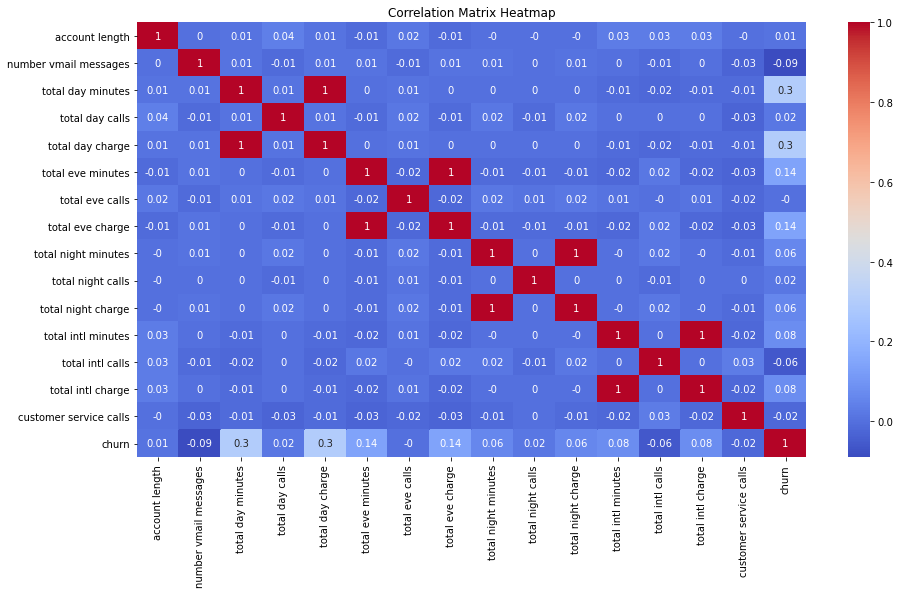

In [118]:
# Calculate the correlation matrix
corr_matrix_columns = df[['account length', 
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', ]]
corr_matrix = corr_matrix_columns.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()


  
+ Proposed remedy is to drop one of the correlated predictors from the model as seen above in the heatmap there is clear correlation with an expectation of an impact on model perfomance and interepretability due to multicollinearity. There is a possibility of overfitting the model.

### 2.2.2 Histograms

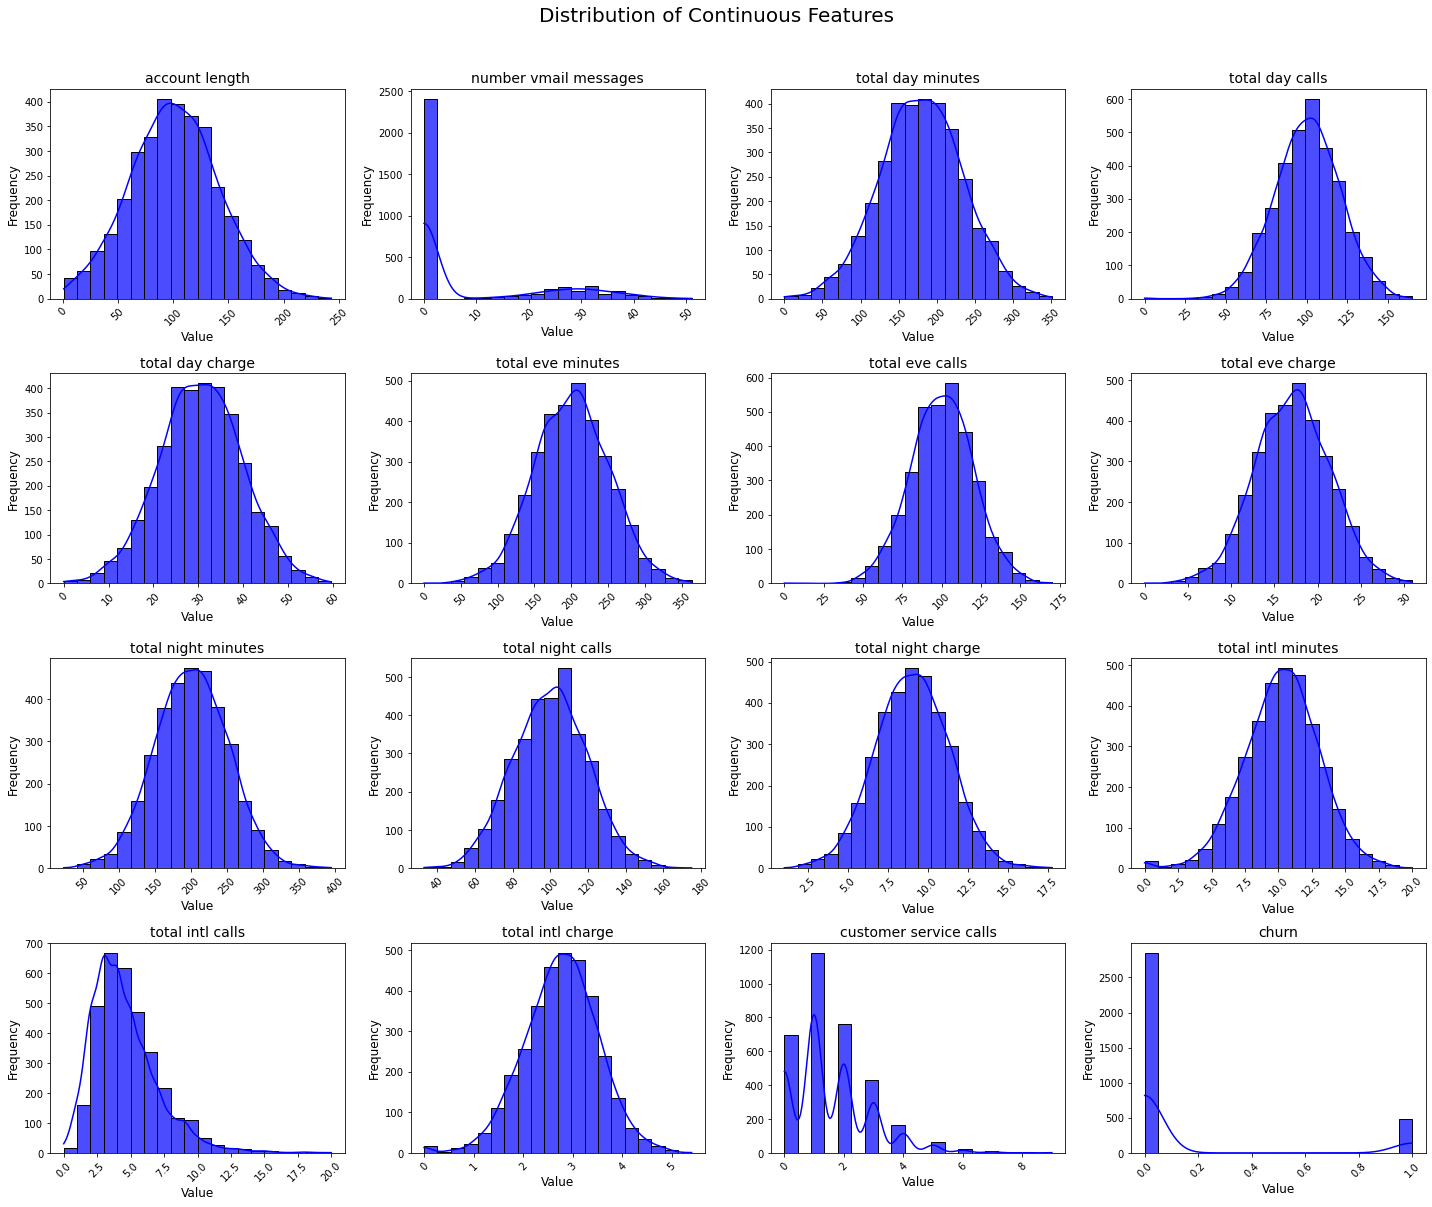

In [120]:
# List of continuous columns to plot
continuous_cols = df[['account length', 
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn']]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 17))  # Adjusted figure size for better clarity
fig.suptitle('Distribution of Continuous Features', fontsize=20)  

for i, col in enumerate(continuous_cols):
    ax = axes.flatten()[i]
    sns.histplot(data[col], bins=20, kde=True, color='blue', alpha=0.7, edgecolor='black', ax=ax)
    ax.set_title(col, fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the super title
plt.show()


- The charts show that the number of calls and charges for local calls are approximately normally distributed.
- The Customer Service Calls show distinct peaks at 1,2, indicating that these values are more frequent.
-  Number of Voice Mail Messages is highly skewed to the right, with most values concentrated around 0 and a few concentrated at 20 - 40. Attributed to the service being an opt in service.


#### 2.2.3 Class distribution of the target variable

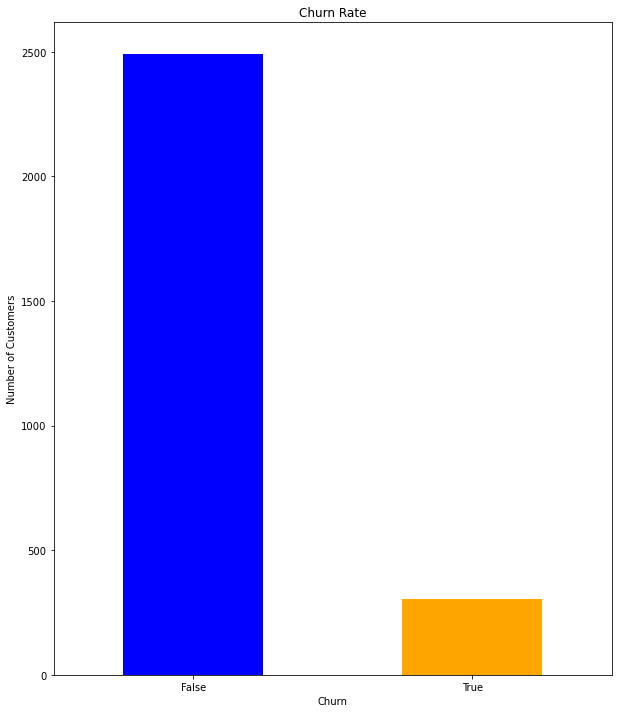

In [117]:
# count the values of the churn column
churn_count = df['churn']. value_counts()
# plot the bar chart
plt.figure(figsize=(10,12))
churn_count.plot(kind="bar",color=["blue", "orange"])
plt.title ('Churn Rate')
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['False', "True"], rotation=0)
plt.show()

From the above plot we can clearly come to a conclusion that there is a significant class imbalance. Therefore a significant impact on reliability of the model.

## 3.0 Modeling 

I'll use a model iteration strategy in this part that takes advantage of feature importance and hyperparameter adjustment to address class imbalance.

### 3.1 Data Preparation

Remove Correlated Columns

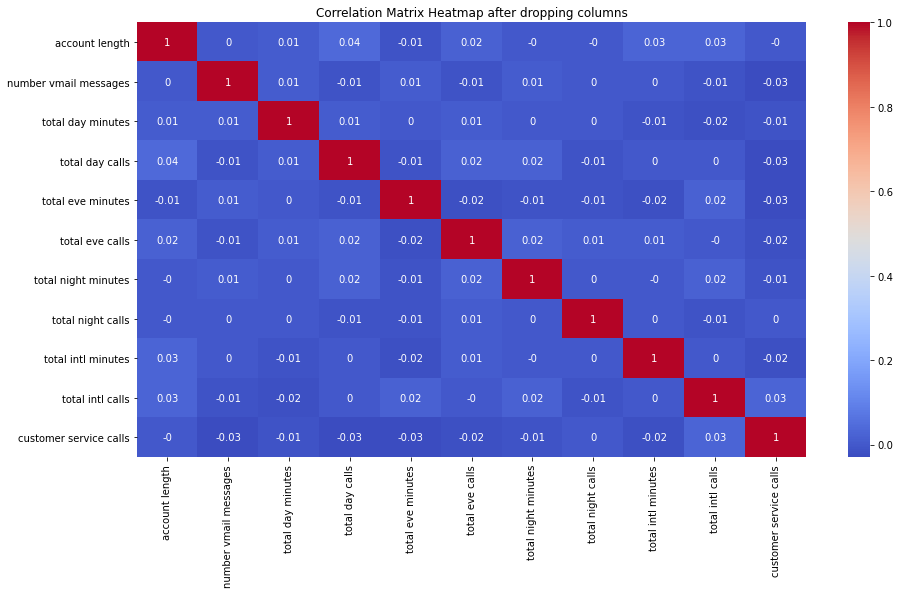

In [128]:
# Calculate the correlation matrix to remove multicollinearity
corr_matrix = df[['account length', 'number vmail messages', 'total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
        'total night minutes', 'total night calls',
        'total intl minutes', 'total intl calls',
        'customer service calls']]
corr_matrix = corr_matrix.corr().round(2)
corr_df = corr_matrix

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap after dropping columns')

plt.show()

## Identify Predictors and Target

In [135]:

# predictors and Target represented by X and y

X = df.drop(columns=['churn','number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 
                        'total intl charge'],axis=1)
y = df['churn']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Intitialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data 
X_train_standardized = scaler.fit_transform(X_train) 
X_test_standardized = scaler.transform(X_test)

# Retain feature names and convert back to DataFrame
X_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_standardized,columns=X_test.columns)

In [136]:
# Display first five columns of the Standardized X_train
X_train.head()

,account length,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-0.260348,-1.953549,1.068323,1.796482,-1.419285,0.743572,-0.583165,0.180406,-0.642563,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
1,-2.030083,-0.876027,-0.348210,0.059342,0.042856,-0.950225,-1.155999,1.000783,1.292046,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2,-0.542480,-2.439006,-2.027065,-0.005522,-0.688215,-1.113011,1.083261,-2.397923,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
3,-0.234700,-0.375340,0.438753,1.082977,2.183849,-2.440025,-1.416378,-0.093053,-0.158911,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
4,1.227255,1.259981,2.589785,-1.696041,1.974972,0.725026,-0.479013,1.899292,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,5.462439,-0.142961


In [137]:
# Display first five columns of the Standardized X_test
X_test.head()

,account length,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1.175958,0.037774,-0.977781,-0.567002,-0.531557,0.632300,-0.583165,-0.093053,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,6.994896
1,0.303915,-0.192580,0.071503,1.952561,0.878366,-0.125993,0.510427,-0.210250,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2,-0.362942,-0.712304,-1.502423,-0.960240,-0.270460,0.201639,-0.479013,-0.835299,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
3,-0.003865,0.664107,1.383109,-0.522408,-0.949311,0.131579,-0.010331,-0.561840,-0.642563,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
4,0.150025,-1.133033,2.170072,0.541768,2.027191,-0.060055,-2.041287,-0.757168,2.259351,0.741072,...,-0.134019,7.566373,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961


In [138]:
# Check the shape of the standardized X_datasets
print(f"The y_train data set consists of {y_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[1]} columns\n")

print(f"The y_test data set consists of {y_test.shape[0]} rows")
print(f"The X_test data set consists of {X_test.shape[0]} rows")
print(f"The X_train data set consists of {X_test.shape[1]} columns")

The y_train data set consists of 2097 rows
The X_train data set consists of 2097 rows
The X_train data set consists of 62 columns

The y_test data set consists of 700 rows
The X_test data set consists of 700 rows
The X_train data set consists of 62 columns


Both the training and test features have been standardized in order to make the model training and evaluation more reliable and effective. The two data sets have a 75.25 split.

In [139]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define a column transformer that applies OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Leave the other columns untouched
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = pipeline.predict(X_test)


c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
# Initialize OneHotEncoder  


ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Fit the encoder to the categorical columns in X_train
ohe.fit(X_train_categorical_cols)

# Transform the data and create a DataFrame
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical_cols),
    index=X_train_categorical_cols.index,
    columns=np.hstack(ohe.categories_)
)

# Output
print(X_train_ohe.head())


       AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL  ...   VA   VT   WA  \
817   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
679   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
56    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1993  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       WI   WV   WY   no  yes   no  yes  
817   0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1373  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
679   0.0  0.0  0.0  0.0  1.0  1.0  0.0  
56    0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1993  0.0  0.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 55 columns]


In [ ]:
# Create train and test data using random_state=42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# output
print(f"The shape for the X_train dataset is: {', '.join(map(str, X_train.shape))}.")
print(f"The shape for the y_train dataset is: {', '.join(map(str, y_train.shape))}.")
print(f"The shape for the X_test dataset is: {', '.join(map(str, X_test.shape))}.")
print(f"The shape for the y_test dataset is: {', '.join(map(str, y_test.shape))}.")

The shape for the X_train dataset is: 2666, 19.
The shape for the y_train dataset is: 2666.
The shape for the X_test dataset is: 667, 19.
The shape for the y_test dataset is: 667.


In [ ]:
# Establish the numerical columns in X_train and X_test datasets
X_train_num_cols = X_train.select_dtypes(include=["int64", "float64"]).copy()rename the variable
X_test_num_cols = X_test.select_dtypes(include=["int64", "float64"]).copy()rename the variable

# Establish the categorical columns in X_train and X_test datasets
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()
X_test_categorical_cols = X_test.select_dtypes(include=["object"]).copy()

# Display the first few rows of each for verification
print("Numerical columns in X_train:")
print(X_train_num_cols.head())
print("\nNumerical columns in X_test:")
print(X_test_num_cols.head())
print("\nCategorical columns in X_train:")
print(X_train_categorical_cols.head())
print("\nCategorical columns in X_test:")
print(X_test_categorical_cols.head())



Numerical columns in X_train:
      account length  area code  number vmail messages  total day minutes  \
817              243        510                      0               95.5   
1373             108        415                      0              112.0   
679               75        415                      0              222.4   
56               141        415                      0              126.9   
1993              86        510                      0              216.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               77   

      total eve charge  total ni

In [ ]:
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit the scaler to the training numerical columns
scaler.fit(X_train_num_cols)

# Transform the numerical columns in the training dataset
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num_cols),
    index=X_train_num_cols.index,
    columns=X_train_num_cols.columns
)

# Transform the numerical columns in the test dataset (if needed)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num_cols),
    index=X_test_num_cols.index,
    columns=X_test_num_cols.columns
)

# Display the first few rows of the scaled training data for verification
print(X_train_scaled.head())


      account length  area code  number vmail messages  total day minutes  \
817         1.000000   1.000000                    0.0           0.266801   
1373        0.442149   0.068627                    0.0           0.314187   
679         0.305785   0.068627                    0.0           0.631246   
56          0.578512   0.068627                    0.0           0.356979   
1993        0.351240   1.000000                    0.0           0.613728   

      total day calls  total day charge  total eve minutes  total eve calls  \
817          0.459259          0.266892           0.450096         0.370588   
1373         0.555556          0.314189           0.532582         0.647059   
679          0.355556          0.631250           0.899093         0.652941   
56           0.503704          0.356926           0.494913         0.364706   
1993         0.488889          0.613682           0.732197         0.452941   

      total eve charge  total night minutes  total night calls

In [ ]:
# Establish the categorical columns in the X_train dataset
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()

# Display the first few rows of the categorical columns for verification
print(X_train_categorical_cols.head())


     state international plan voice mail plan
817     UT                 no              no
1373    SC                 no              no
679     TX                yes              no
56      CO                 no              no
1993    IN                 no              no


Modelling

Decision tree, Logistic regression
